# Sales Analysis of ABC Company

<p> The data set contains the sales information about the ABC company of year 2019.The data includes the attributes such as Order ID, Product, Quantity Ordered, Price Each, Ordered Date and Purchase Address. The following page includes:
    
    1. Data Understanding
    2. Data Preparation
    3. Data Analysis
    4. Data Exploration
    
</p>

<p> Inorder to conduct the data analysis various python libraries have been used:
    
    - OS
    - matplotlib
    - Pandas
</p>

## Data Preparation

**Data Preparation**
: It is defined as the process of taking raw data and getting it ready for ingestion in an analytics platform. Inorder to achieve the final stage of preparation, the data must be cleansed, formatted, and transformed into something which can be easily analysized by the computer.

Data Preparation phase involves following process:

-	Access the data.
-	Fetch the data.
-	Cleanse the data.
-	Format the data.
-	Combine the data.
-	And analyse the data

    




# <mark> Importing python libraries </mark>

- **matplotlib pyplot as plt:** this library is used for data visulization
- **pandas as pd:** It is used for working with data sets.It has functions for analyzing, cleaning, exploring, and manipulating   data
- **os:** It lets the user interact with the native OS Python is currently running on.

In [1]:
# importing libraries

import os
import pandas as pd
import matplotlib.pyplot as plt


## listing all the files in the folder

To list all the file in the "S:/second year/smart data discovery/cw" location **os.listdir** is used and the files are stored in the list in the form of list.

In [2]:
path="S:/second year/smart data discovery/cw/" # giving the location where CSV files are stored

list=os.listdir(path)

list
    

['22015819,Suyasha Adhikari.docx',
 'CC5067NISmartDataandDiscoveryY23SpringMainSitCW.pdf',
 'combine.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

## creating a new .csv file with combined data in same file path

1. Firstly the files in list is read in df using pd.read_csv
2. Then the content of df is transferred to final dataframe by using **concat**
3. To create the combined CSV file **to_csv** is used

In [3]:
final=pd.DataFrame()

for i in list:
    if i.endswith('.csv'):
        df=pd.read_csv(path+i)
        final=pd.concat([final,df])
        
final.to_csv(path+"combine.csv")

## Read in the updated dataframe

<p>The csv file created is then read in new dataframe called combine_data using pd.read_csv</p>

In [4]:
combine_data=pd.read_csv(path+"combine.csv")
combine_data.head()

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,0.0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,3.0,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,4.0,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
combine_data.shape # this gives the shape of the dataframe

(373700, 8)

In [6]:
combine_data.columns #this returns the list of columns in the dataframe

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered',
       'Price Each', 'Order Date', 'Purchase Address'],
      dtype='object')

In [7]:
combine_data.dtypes # this gives the datatype of the columns of the dataframe

Unnamed: 0.1          int64
Unnamed: 0          float64
Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

## Removing the null value from updated dataframe

As null data can cause errors in the process of data analysis it is necessary to remove them. To remove them firstly its necessary to know exactly where the null values are located. To find that the null value is seperated using **isna()** and then stored in the **null_df**. **null_df.head()** helps to see the content of the **null_df** dataframe.We can see that the null value is present in each column. 

Then **isnull().sum()** is used to find the no of null value in each column. 

Now the dropna() is used to drop the null value. By default dropna() dont make permanent changes so **combine_data=combine_data .dropna(how='any')** is used, this make permanent change. Or we can also use **inplace=True**. The **how='any'** used drops the row if any of the values in that row are missing. 

In [8]:

null_df=combine_data[combine_data.isna().any(axis=1)] #storing the null value in one dataframe to see the null value 
null_df.head()

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
356,356,356.0,NaN,NaN,NaN,NaN,NaN,NaN
519,519,519.0,NaN,NaN,NaN,NaN,NaN,NaN
735,735,735.0,NaN,NaN,NaN,NaN,NaN,NaN
1149,1149,1149.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
combine_data.isnull().sum() #gives the sum of null value of each column

Unnamed: 0.1             0
Unnamed: 0          186850
Order ID              1800
Product               1800
Quantity Ordered      1800
Price Each            1800
Order Date            1800
Purchase Address      1800
dtype: int64

In [10]:
combine_data=combine_data.dropna(how='any') #drop the null value from combine_data

In [11]:
combine_data.isnull().sum() # checking if null value are deleted

Unnamed: 0.1        0
Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
combine_data.shape # gives the shape of the dataframe

(185950, 8)

# Changing Quantity Ordered and Price Each price to numeric

Inoder to make calculation for the analysis of data we are required to change the OrderQuantity and Price Each to numeric. But when we use dtypes to see the datatype it can be seen it is already in float64 which is also numeric. So, there is no need to change it to numeric.

We could have used **combine_data['Quantity Ordered']=combine_data['Quantity Ordered'].astype('int64')** to change Quantity Ordered to numeric and **combine_data['Price Each']=combine_data['Price Each'].astype('int64')** to change Price Each to numeric if it was in String .

In [13]:
combine_data.dtypes #checking datatype

Unnamed: 0.1          int64
Unnamed: 0          float64
Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [14]:
#combine_data['Quantity Ordered']=combine_data['Quantity Ordered'].astype('int64')

In [15]:
#combine_data['Price Each']=combine_data['Price Each'].astype('int64')

# Creating month column from order date and changing to int

For creating month column we can apply **split('/')** in order date column and take the value of the index [0]. As the index [0] has the value of month in our dataset. Then the month column is converted into int dtype.

We could have also change order date column into date dtype and then use the **dt.month** to take month from the order date.

In [16]:
combine_data['Month']=combine_data['Order Date'].apply(lambda x:x.split('/')[0]) # taking month from order date

combine_data.head()

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,0.0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
2,2,2.0,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
3,3,3.0,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,4.0,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,5,5.0,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


In [17]:
combine_data['Month']=combine_data['Month'].astype('int32') # changing month to integer

In [18]:
combine_data.dtypes # checking datatypes

Unnamed: 0.1          int64
Unnamed: 0          float64
Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

# Creating city from purchase address

The Purchase address column in the csv file has full address of the person who purchased. We are needed to make a seperate column for the city field of the address. For that **split(',')** is used to split the data in the column. As, the City is in the 1 index we fetch the data from index[1] and then store it in the City column.

In [19]:
combine_data['City']=combine_data['Purchase Address'].apply(lambda x:x.split(',')[1])
#splitting Prchase Address data at (,) storing the value of index[1] at City column
 
combine_data.head()

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,0,0.0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,2,2.0,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,3,3.0,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,4,4.0,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,5,5.0,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


## Finding the mean, std, skewness and kurtosis


creating a new columnn **Total Sales** is created by multiplying **Quantity Ordered** and **Price Each** for calculating mean, std, skewness and kurtosis

In [20]:
combine_data['Total Sales']=combine_data['Quantity Ordered']*combine_data['Price Each'] #creating Total Sales column
combine_data.tail()

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Sales
186845,186845,11681.0,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,8.97
186846,186846,11682.0,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,700.00
186847,186847,11683.0,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,700.00
186848,186848,11684.0,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,379.99
186849,186849,11685.0,259357.0,USB-C Charging Cable,1.0,11.95,9/30/2019 0:18,"250 Meadow St, San Francisco, CA 94016",9,San Francisco,11.95


In [21]:
mean_amount_spend = combine_data['Total Sales'].mean() #calculating mean
mean_amount_spend

185.49091675146175

In [22]:
std_amount_spend  = combine_data['Total Sales'].std() #calculating mean
std_amount_spend 

332.91977138642756

In [23]:
skw_amount_spend  = combine_data['Total Sales'].skew()#calculating skewness
skw_amount_spend

2.8819126688871703

In [24]:
kuro_amount_spend  = combine_data['Total Sales'].kurtosis()#calculating kurtosis
kuro_amount_spend

9.227075063658269

## Creating Box plot for Total sales

**Box Plot**
:It is a graphical representation of a dataset that displays the distribution of the data along with measures of central tendency and variability.

In boxplot the line in the rectangle represent the mean, the bottom part represent first quartile and the top represents third quartile. A vertical line that is drawn from the bottom of the rectangle is the minimum value of the data, and another line that is drawn from the top of the rectangle is the maximum value of the data. It also shows the presence of outlines, which is plotted outside the minimum and maximum value.

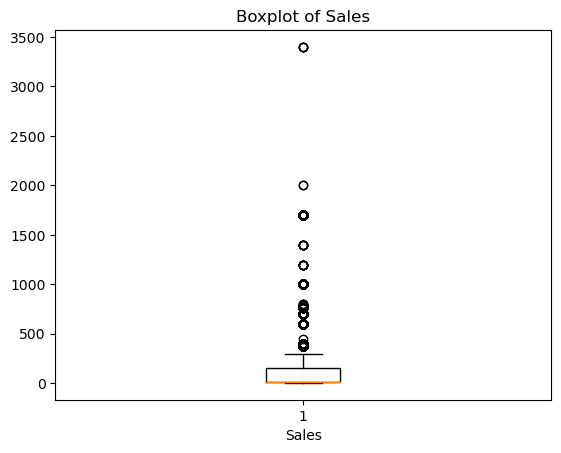

In [25]:
plt.boxplot(combine_data['Total Sales'])
plt.xlabel('Sales')
plt.title('Boxplot of Sales')
plt.show()

In [26]:
mean_quantity_ordered = combine_data['Quantity Ordered'].mean()#calculating mean
mean_quantity_ordered

1.1243828986286637

In [27]:
sum_quantity_ordered = combine_data['Quantity Ordered'].sum()#calculating sum
sum_quantity_ordered

209079.0

In [28]:
std_quantity_ordered = combine_data['Quantity Ordered'].std()#calculating std
std_quantity_ordered 

0.44279262402849096

In [29]:
skw_quantity_ordered = combine_data['Quantity Ordered'].skew()#calculating skewness
skw_quantity_ordered 

4.833164172577953

In [30]:
kuro_quantity_ordered = combine_data['Quantity Ordered'].kurtosis()#calculating kurtosis
kuro_quantity_ordered 

31.82048892027536

## Creating Box plot for Quantity Ordered

**Box Plot**
:It is a graphical representation of a dataset that displays the distribution of the data along with measures of central tendency and variability.

In boxplot the line in the rectangle represent the mean, the bottom part represent first quartile and the top represents third quartile. A vertical line that is drawn from the bottom of the rectangle is the minimum value of the data, and another line that is drawn from the top of the rectangle is the maximum value of the data. It also shows the presence of outlines, which is plotted outside the minimum and maximum value.

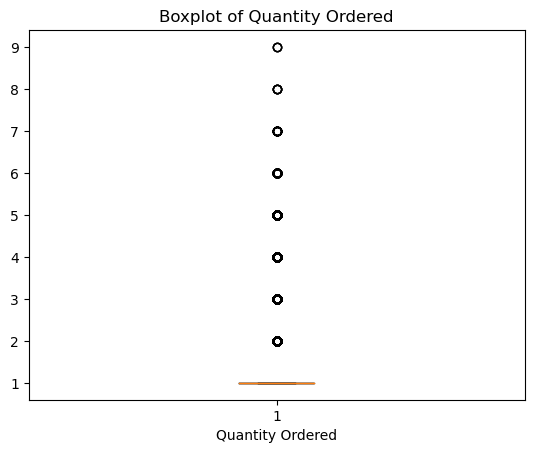

In [31]:
plt.boxplot(combine_data['Quantity Ordered'])
plt.xlabel('Quantity Ordered')
plt.title('Boxplot of Quantity Ordered')
plt.show()

## Checking Correlation

**Correlation**
:Correlation is a statistical measure that quantifies the degree of association or relationship between two variables. It is commonly used in data analysis to determine whether and to what extent two variables are related.

It is tested for statistical significance and correlation coefficient, r, quantifies the strength of the relationship. The correlation coefficient which ranges from -1 to +1. 

1. The closer r is to zero, the weaker the linear relationship.
2. Positive r values indicate a positive correlation, where the values of both variables tend to increase together.
3. Negative r values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease.

In [32]:
combine_data.corr()

,Unnamed: 0.1,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Total Sales
Unnamed: 0.1,1.000000,0.034948,0.210779,-0.000496,-0.002209,0.236488,-0.002315
Unnamed: 0,0.034948,1.000000,0.357507,-0.003133,0.001471,0.266516,0.001373
Order ID,0.210779,0.357507,1.000000,0.000702,-0.002857,0.993063,-0.002949
Quantity Ordered,-0.000496,-0.003133,0.000702,1.000000,-0.148272,0.000791,-0.139417
Price Each,-0.002209,0.001471,-0.002857,-0.148272,1.000000,-0.003375,0.999203
Month,0.236488,0.266516,0.993063,0.000791,-0.003375,1.000000,-0.003466
Total Sales,-0.002315,0.001373,-0.002949,-0.139417,0.999203,-0.003466,1.000000


In the following data we can see the value closer to zero. This shows the weak correlation between the columns. The highest positive correlation that we can see is **0.993063** between **Month and Order ID**. While the highest negative correlation is 
**-0.002949** between **Total price and Order ID**

## Which Month has the best sales? and how much was the earning in that month? Make a bar graph of sales as well. 

Firstly finding the total sales of each month by using **month_results=combine_data.groupby('Month')['Total Price'].sum().reset _index()**

Groupby is used to group the data which has same month and then Total Sales is added. The reset_index is used to change the column name.

In [33]:
month_results=combine_data.groupby('Month')['Total Sales'].sum().reset_index(name='Total Sales')
month_results

,Month,Total Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


In [34]:
month_results.max()# this finds the month with maximum saleD

Month               12.00
Total Sales    4613443.34
dtype: float64

## Plotting for monthly sales

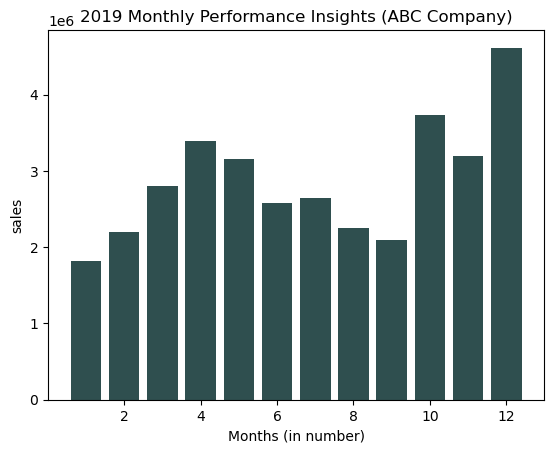

In [35]:

plt.bar(month_results['Month'],month_results['Total Sales'],color='darkslategrey')# for plotting
plt.ylabel('sales')# for y label
plt.xlabel('Months (in number)')# for x label
plt.title('2019 Monthly Performance Insights (ABC Company)')#for title of bar graph
plt.show()

From the graph we can find that **december** has highest sales while **january** has lowest sale

##  Which city has sold the highest product?

Firstly finding the total sales of each city by using **combine_data.groupby('City').sum()['Total Sales'].reset_index()**

Groupby is used to group the data which has same city and then Total Sales is added. The reset_index is used to change the column name.

In [36]:
city_results=combine_data.groupby('City').sum()['Total Sales'].reset_index(name='Total Sales')
city_results

,City,Total Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


## Plotting the graph for City sales

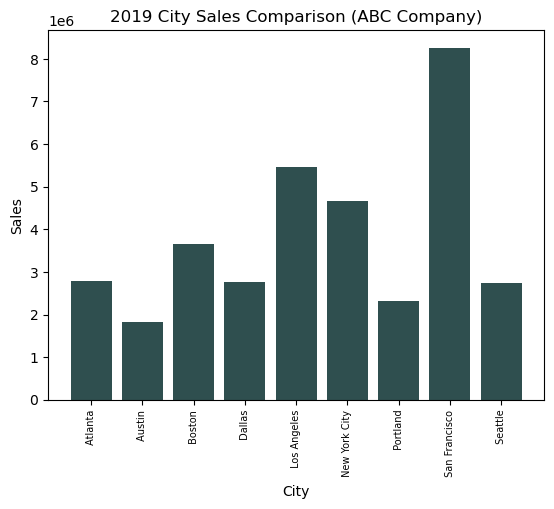

In [37]:

plt.bar(city_results['City'],city_results['Total Sales'],color='darkslategrey')#for plotting
plt.xticks(rotation=90,size=7)# for rotation of x index
plt.ylabel('Sales')#for y label
plt.xlabel('City')#for y label
plt.title('2019 City Sales Comparison (ABC Company)')# for title
plt.show()

From graph we can find **San Francisco** has highest sale while **Austin** has lowest sale

## Which product was sold the most in overall? Illustrate it through bar 


Firstly finding the total order of each product by using **combine_data.groupby('Product')['Quantity Ordered'].sum().reset_ index(name='Total Order')**

Groupby is used to group the data which as same product name and then quantity ordered is added. The reset_index is used to change the column name.

In [38]:
product_result=combine_data.groupby('Product')['Quantity Ordered'].sum().reset_index(name='Total Order')
product_result

,Product,Total Order
0,20in Monitor,4129.0
1,27in 4K Gaming Monitor,6244.0
2,27in FHD Monitor,7550.0
3,34in Ultrawide Monitor,6199.0
4,AA Batteries (4-pack),27635.0
5,AAA Batteries (4-pack),31017.0
6,Apple Airpods Headphones,15661.0
7,Bose SoundSport Headphones,13457.0
8,Flatscreen TV,4819.0
9,Google Phone,5532.0


## Plotting graph for Product order

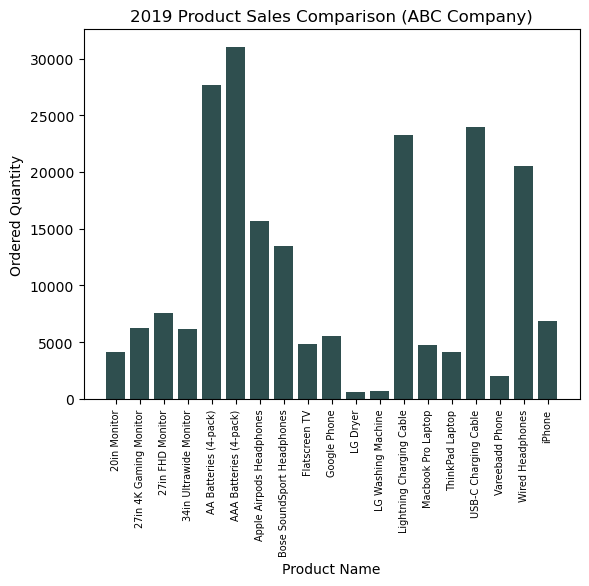

In [39]:

plt.bar(product_result['Product'],product_result['Total Order'],color='darkslategrey')# plotting graph
plt.xticks(rotation=90,size=7)
plt.ylabel('Ordered Quantity')# for y label
plt.xlabel('Product Name')# for x lebel
plt.title('2019 Product Sales Comparison (ABC Company)') #for title of bar graph
plt.show()

From the graph we can see that **AAA Batteries (4-pack)** has highest order while **LG DRYER** has lowest order

# Histogram Plot

**Histogram**
: A histogram is a graphical representation of data that displays the distribution of numerical data. It is a type of bar chart that shows the frequency distribution of a set of continuous or discrete data.


## Histogram of hour

1. Firstly the hour from order date is fetched and then stored in the new columnn called hour
2. Then it is plot into histogram

In [40]:
combine_data['hour'] = pd.to_datetime(combine_data['Order Date']).dt.hour
combine_data.head()

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Sales,hour
0,0,0.0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90,8
2,2,2.0,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99,22
3,3,3.0,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00,14
4,4,4.0,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99,14
5,5,5.0,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99,9


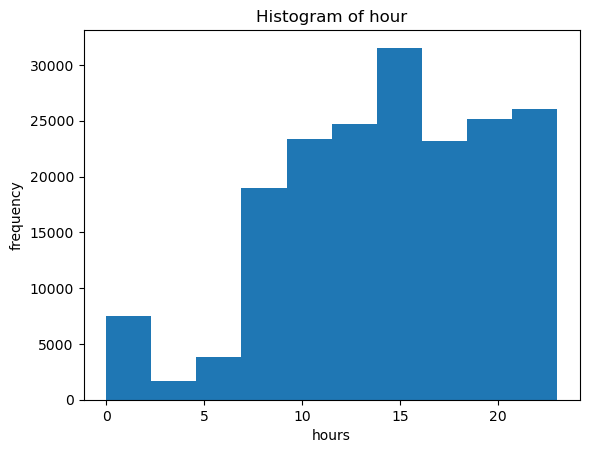

In [41]:
plt.hist(combine_data['hour'])# for plotting histogram


plt.xlabel('hours')# gives label for x axis
plt.ylabel('frequency')# gives label for y axis
plt.title('Histogram of hour')# gives the title to histogram

plt.show()


## Histogram of Quantity Ordered

In the same way as plotting histogram of hour histogram of Quantity Ordered is plot.





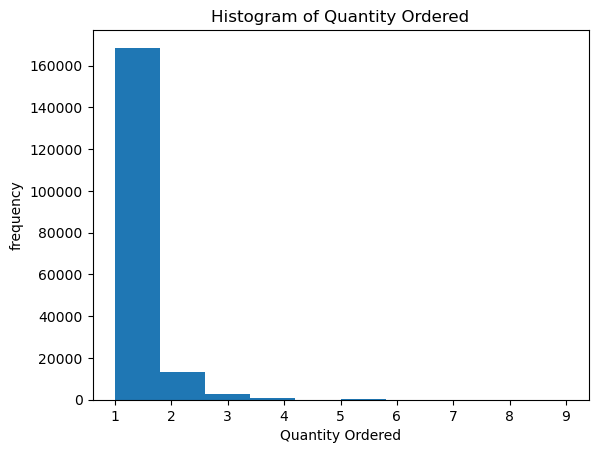

In [42]:
plt.hist(combine_data['Quantity Ordered']) # for plotting histogram


plt.xlabel('Quantity Ordered')# gives label for x axis
plt.ylabel('frequency')# gives label for y axis
plt.title('Histogram of Quantity Ordered') # gives the title to histogram

plt.show()

In [52]:
combine_data.columns=['Unnamed: 0.1', 'Unnamed: 0', 'Order ID', 'Products', 'Quantity Ordered',
       'Price Each', 'Order Date', 'Purchase Address', 'Month', 'City',
       'Total Sales', 'hour']

combine_data

,Unnamed: 0.1,Unnamed: 0,Order ID,Products,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Sales,hour
0,0,0.0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90,8
2,2,2.0,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99,22
3,3,3.0,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00,14
4,4,4.0,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99,14
5,5,5.0,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99,9
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,186845,11681.0,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,8.97,20
186846,186846,11682.0,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,700.00,16
186847,186847,11683.0,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,700.00,7
186848,186848,11684.0,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,379.99,17
